In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
from sklearn.datasets import make_classification


In [112]:
## creating the dataseet
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [113]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224
...,...,...,...,...,...,...,...,...,...,...
995,-1.367638,1.462255,-1.154918,-0.290454,-0.413424,0.032396,1.545490,1.428760,1.687092,1.072542
996,-1.514876,-3.221016,-1.300744,0.395599,-0.527994,1.353069,1.777506,-1.680870,1.798510,0.034272
997,1.674633,1.754933,1.586154,0.018402,-1.514470,0.321593,-2.417694,0.692723,-1.503850,0.225264
998,-0.778609,-0.835689,-0.194842,1.097220,0.180071,-0.272933,-0.533188,-0.497354,2.472138,0.867187


In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [115]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [116]:
y_pred = logistic.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [118]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.8466666666666667
[[118  17]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



## Hyperparameter Tuning and Cross Validation

In [119]:
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']


In [120]:
params = dict(penalty = penalty, C=c_values, solver = solver)


In [121]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [122]:
##GridSearhCV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv = cv, n_jobs = -1)

In [123]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [124]:
grid.fit(X_train, y_train)

e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, se

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [125]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [126]:
grid.best_score_

np.float64(0.8785714285714287)

In [127]:
y_pred = grid.predict(X_test)

In [128]:
score = accuracy_score(y_pred, y_test)
print(score)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.8533333333333334
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       157
           1       0.80      0.92      0.86       143

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300

[[124  33]
 [ 11 132]]


## Randomized SearchCV

In [129]:
from sklearn.model_selection import RandomizedSearchCV

In [130]:
model = LogisticRegression()
randomcv =  RandomizedSearchCV(estimator=model, param_distributions=params, cv = 5, scoring='accuracy')

In [131]:
randomcv.fit(X_train, y_train)

e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [132]:
randomcv.best_score_

np.float64(0.8728571428571428)

In [133]:
randomcv.best_params_

{'solver': 'sag', 'penalty': 'l2', 'C': 0.1}

In [134]:
y_pred = randomcv.predict(X_test)

In [135]:
score = accuracy_score(y_pred, y_test)
print(score)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.8533333333333334
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       149
           1       0.82      0.90      0.86       151

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300

[[120  29]
 [ 15 136]]


## Logistic Regression for Multiclass Classification problem

In [136]:
## creating the dataseet
X, y = make_classification(n_samples=1000, n_features=10,n_informative= 3, n_classes=3, random_state=42)

In [137]:
X

array([[ 0.7715326 , -1.47433614,  2.19664605, ...,  0.68174341,
         1.08996189,  0.96250289],
       [ 1.85838284, -3.68087983,  0.22749588, ..., -0.47417818,
         1.34113888, -0.77177196],
       [-0.98724764,  1.53916836,  0.5859042 , ..., -0.32202815,
        -1.45103394,  1.32543211],
       ...,
       [-1.227082  ,  1.65602784,  0.47263035, ..., -0.8634936 ,
        -1.83932326, -0.03120349],
       [ 1.28527572, -0.29715202, -0.67172079, ..., -1.31544131,
         2.85446468,  1.3094441 ],
       [-0.75428048,  0.88516075, -1.6728939 , ..., -2.0362205 ,
        -1.43989584,  0.04749347]])

In [138]:
y

array([1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1,
       2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2,
       0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2,
       1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2,
       1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2,
       2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1,

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [140]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class='ovr')
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [141]:
y_pred

array([2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0,
       1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1])

In [142]:
score = accuracy_score(y_pred, y_test)
print(score)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.68
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       113
           1       0.40      0.58      0.47        65
           2       0.86      0.71      0.78       122

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.72      0.68      0.70       300

[[79 31  3]
 [16 38 11]
 [ 8 27 87]]


## Logistic Regression for Imbalanced Dataset

In [143]:
from collections import Counter
from sklearn.datasets import make_classification

In [144]:
X, y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=10)

In [145]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [146]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

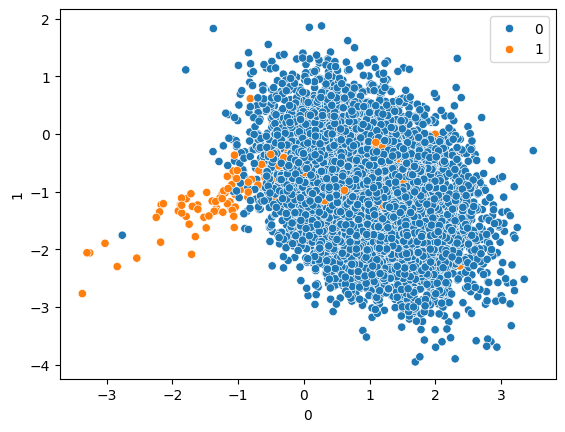

In [147]:
import pandas as pd
sns.scatterplot(x = pd.DataFrame(X)[0],y = pd.DataFrame(X)[1], hue=y)

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [149]:
## Hyperparameter tuning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [150]:
params = dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight)

In [151]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [152]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv = cv, n_jobs = -1)

In [153]:
grid.fit(X_train, y_train) 

e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [154]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [155]:
y_pred = grid.predict(X_test)

In [156]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [158]:
score = accuracy_score(y_pred, y_test)
print(score)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.9896
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2491
           1       0.26      1.00      0.41         9

    accuracy                           0.99      2500
   macro avg       0.63      0.99      0.70      2500
weighted avg       1.00      0.99      0.99      2500

[[2465   26]
 [   0    9]]


## Logistic Regression with ROC curve and ROC AUC score

In [159]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


In [160]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [161]:
#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [162]:
# we have created a dummy model with default 0 as output
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [163]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [164]:
# prediction based on probability
model_prob = model.predict_proba(X_test)

In [165]:
# focusing on the positive outcomes
model_prob = model_prob[:,1]

In [166]:
#lets calculate the scores
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9232456140350878


In [167]:
# calculating the roc
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, threshold = roc_curve(y_test, model_prob)

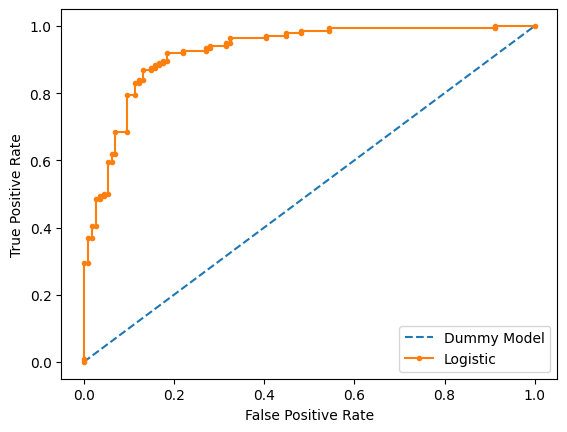

In [168]:
# plot the roc curve
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the Legend
pyplot.legend()
#show the plot
pyplot.show()

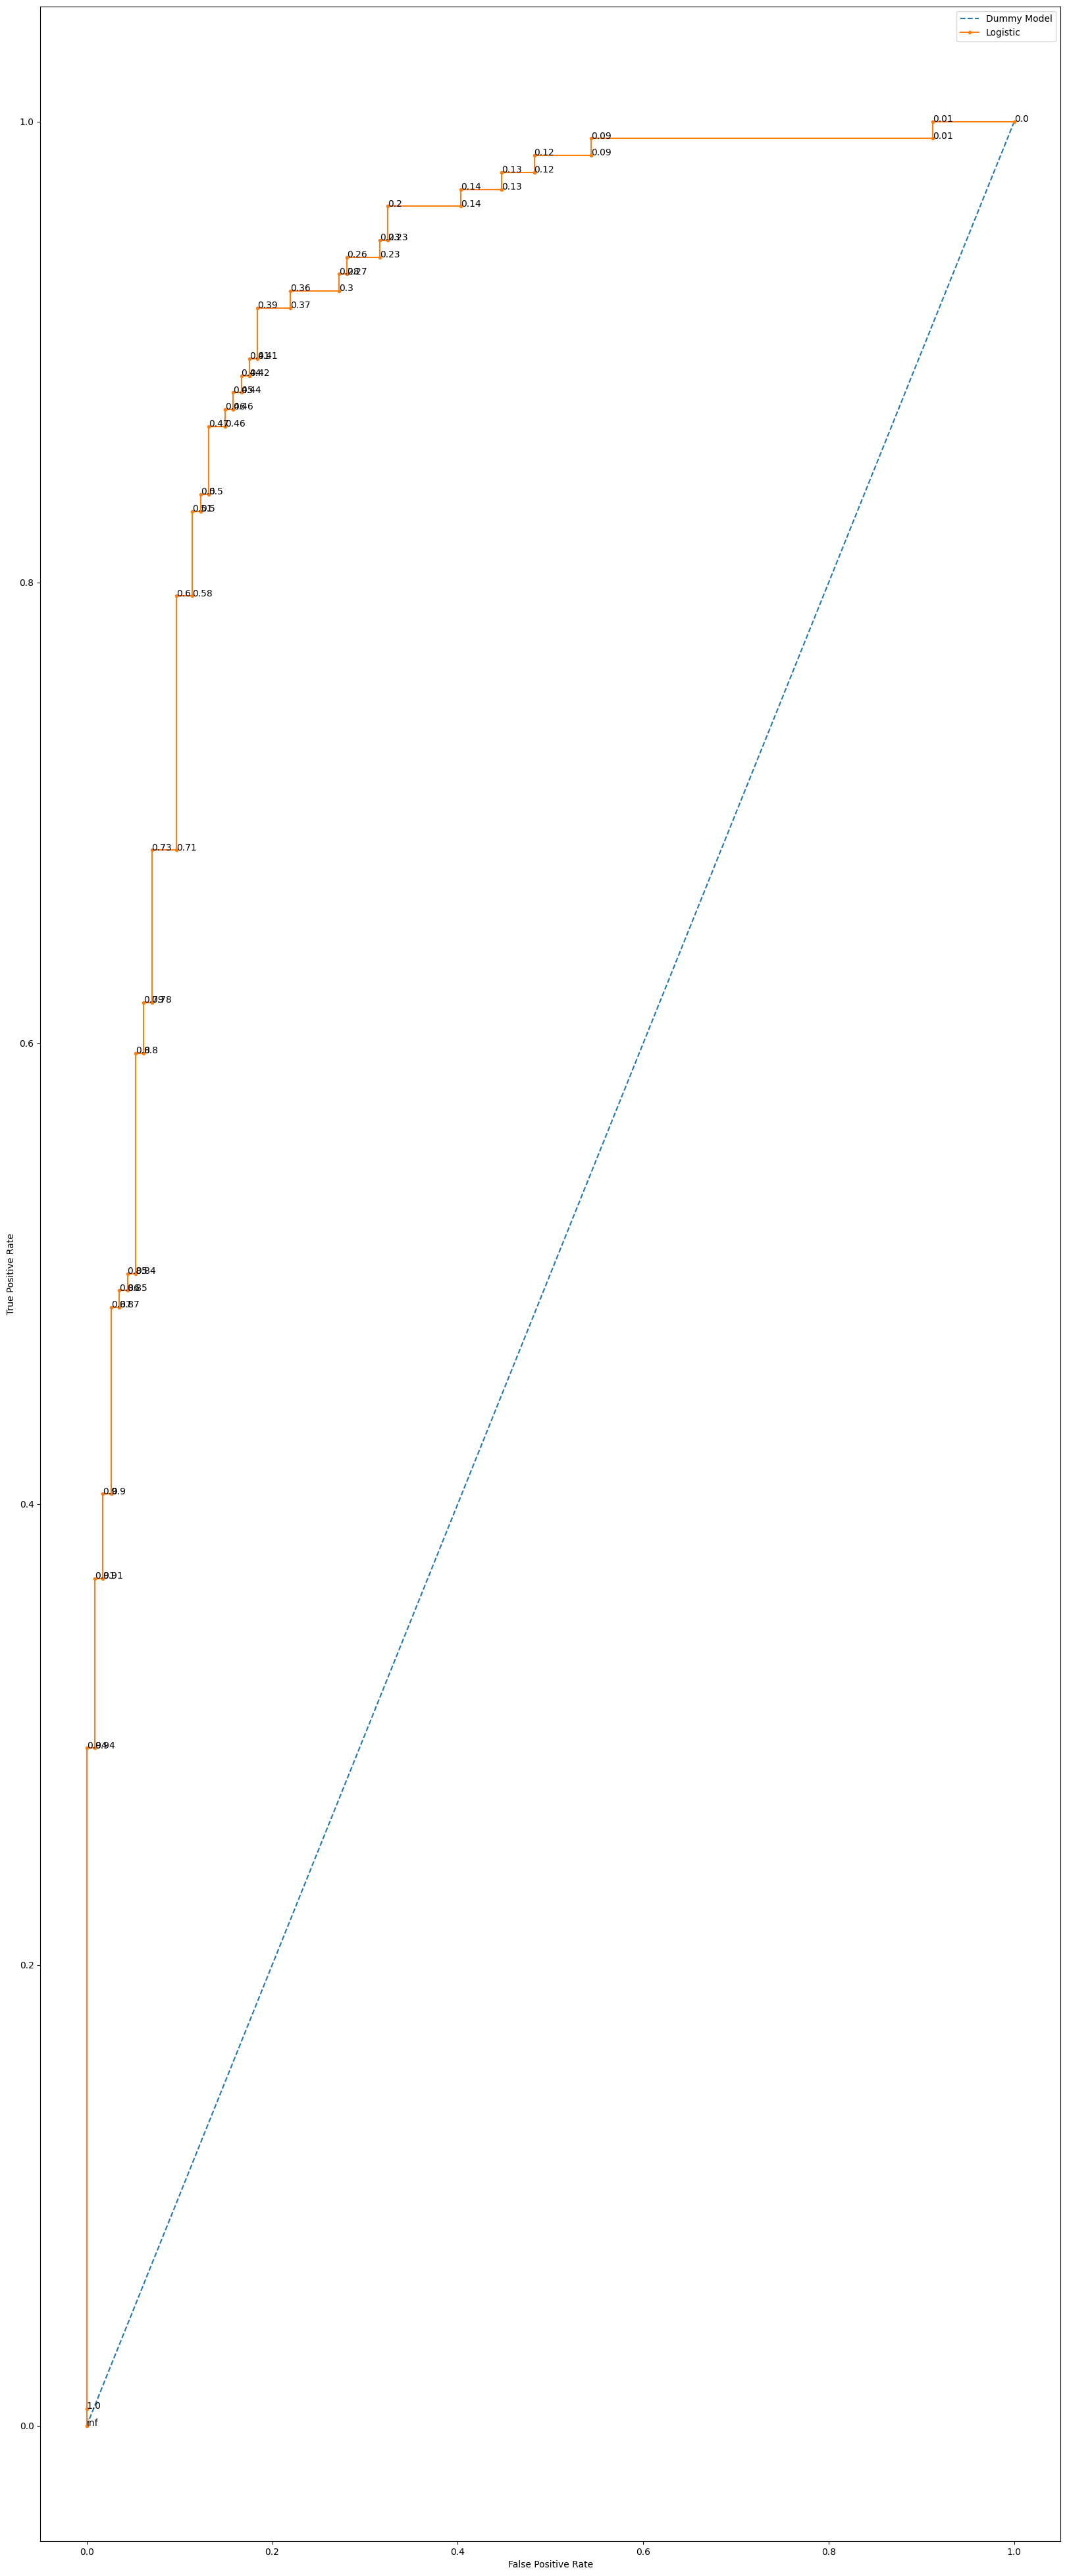

In [169]:
# plot the roc curve
import numpy as np
fig = pyplot.figure(figsize=(20, 50))
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr, threshold):
    ax.annotate('%s' % np.round(xyz[2], 2), xy = (xyz[0], xyz[1]))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the Legend
pyplot.legend()
#show the plot
pyplot.show()